<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-AppliedComputationalMethods/blob/main/Module_C_Section_19_1%2C_19%2C2%2C_19_3%2C_19_4_19_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module C: Root Finding**
## Sections 19.1, 19,2, 19.3, 19.4 19.5

### Bisection Method with Graphs in Python

The simplest root finding algorithm is the bisection method. This program implements Bisection Method for finding real root of nonlinear equation in python programming language. This program shows you table and graph related to the function and the root. 



```
Parameters
*   f : The function for which we are trying to approximate a solution f(x)=0.
*   xl , xu : The interval in which to search for a solution. The function returns None if f(xl)*f(xu) >= 0 since a solution is not guaranteed.
*   N : number of iterations
*   eps : Acceptable Error
*   Epsilon : (xm(new)-xm(old))/xm(new))*100
*   xm : (xl-xu)/2

```



In [7]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [8]:
# Input Parameters
N = 50           # Max. number of iterations
eps = 1     # Acceptable Error 
xl = 1        # Guess Value for the lower bound on the root
xu = 2       # Guess Value for the upper bound on the root

if f(xl) * f(xu) >= 0:
        print("Bisection method fails.")

# Input lists
xm_list = []
Epsilon = [100]
xl_list = [xl]
xu_list = [xu]
f_list = []

In [9]:
for i in range(N):
        xm = (xl + xu) / 2
        xm_list.append(xm)
        f_list.append(f(xm))
                
        if f(xm) == 0:
                print('Root found : ' +str(xm))
        elif i >= 1:
                Epsilon.append((abs( (xm_list[i] - xm_list[i-1]) / xm_list[i]) * 100))
                  
        if Epsilon[i] < eps:
                break        
        elif f(xl) * f(xm) < 0:
                xu = xm
                xl_list.append(xl)
                xu_list.append(xu)                                        
        else:
                xl = xm
                xl_list.append(xl)
                xu_list.append(xu)



# Table
columns = ["Iteration", "xl", "xu", "xm", "Epsilon%", "f(xm)"]
  
Table = PrettyTable()
  
# Add Columns
Table.add_column(columns[0], range(1,i+2))
Table.add_column(columns[1], [round(num, 4) for num in xl_list][:i+1])
Table.add_column(columns[2], [round(num, 4) for num in xu_list][:i+1])
Table.add_column(columns[3], [round(num, 4) for num in xm_list][:i+1])
Table.add_column(columns[4], [round(num, 4) for num in Epsilon][:i+1])
Table.add_column(columns[5], [round(num, 8) for num in f_list][:i+1])

print(Table)
print('Root found : '+str(xm_list[i]))

+-----------+--------+--------+--------+----------+-------------+
| Iteration |   xl   |   xu   |   xm   | Epsilon% |    f(xm)    |
+-----------+--------+--------+--------+----------+-------------+
|     1     |   1    |   2    |  1.5   |   100    |  0.15239296 |
|     2     |   1    |  1.5   |  1.25  |   20.0   | -0.02881757 |
|     3     |  1.25  |  1.5   | 1.375  |  9.0909  |  0.05829189 |
|     4     |  1.25  | 1.375  | 1.3125 |  4.7619  |  0.01371258 |
|     5     |  1.25  | 1.3125 | 1.2812 |  2.439   |  -0.0078275 |
|     6     | 1.2812 | 1.3125 | 1.2969 |  1.2048  |  0.00287615 |
|     7     | 1.2812 | 1.2969 | 1.2891 |  0.6061  | -0.00249257 |
+-----------+--------+--------+--------+----------+-------------+
Root found : 1.2890625


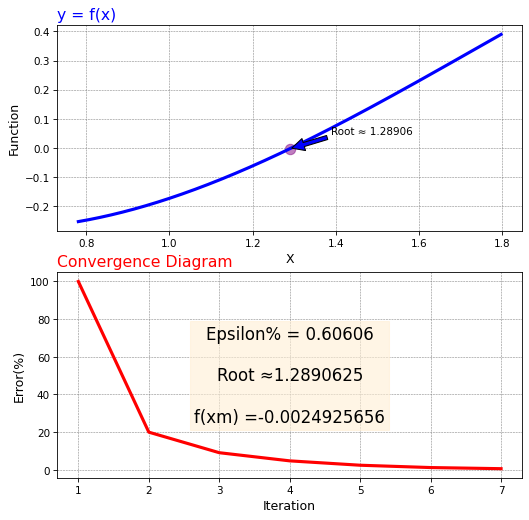

In [10]:
#Plot
fig = figure(figsize=(8, 8), dpi=75)
plt.subplot(2,1,1)
x = np.arange(xl-0.5,xu+0.5,0.00001)
y = f(x)
font1 = {'color':'blue','size':15}

plt.annotate('Root ≈ '+str(np.round(xm,5)), xy=(xm, f(xm)),xytext=(xm+0.1, f(xm)+0.05), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.plot(x, y, 'b-', linewidth=3)
plt.scatter(xm,f(xm), c='purple', s=100,alpha=0.5)
plt.xlabel('X', fontsize=12)
plt.ylabel('Function', fontsize=12)
plt.title('y = f(x)', fontdict=font1, loc='left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.subplot(2,1,2)
x = np.arange(1,i+2)
y = Epsilon
font2 = {'color':'red','size':15}
text = plt.text((i+2)/2, 50, 'Epsilon% = '+str(np.round(Epsilon[i],5))+'\n\nRoot ≈'+str(np.round(xm,7))+'\n\nf(xm) ='+str(np.round(f(xm),10)), fontsize=16,horizontalalignment='center',verticalalignment='center')
text.set_bbox(dict(facecolor='papayawhip', alpha=0.6, edgecolor='papayawhip'))
plt.plot(x, y, 'r-', linewidth=3)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Error(%)', fontsize=12)
plt.title('Convergence Diagram', fontdict=font2, loc='left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()
   
                        

### Secant Method with Graphs in Python

This program implements Secant method for finding real root of nonlinear function in python programming language. This program shows you table and graph related to the function and the root. 


```
Parameters
*   f : The function for which we are trying to approximate a solution f(x)=0.
*   x0 : First guess 
*   x1 : Second guess
*   N : number of iterations
*   eps : Acceptable Error
*   Epsilon : (xm_list(new)-xm_list(old))/xm_list(new))*100
```




In [3]:
import numpy as np
import sympy as sp
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [4]:
## Define the function whose roots are required
def f(x):
    return np.exp(-x) - np.cos(x)

# Input Parameters
N = 50           # Max. number of iterations
eps = 1         # Acceptable Error 
x0 = 1
x1 = 2

# Input lists
xm_list = [x0, x1]
Epsilon = [100]
f_list = [f(x0), f(x1)]


In [5]:
for i in range(2,N):
        
         #Estimated Relative Error
        Epsilon.append((abs( (xm_list[i-1] - xm_list[i-2]) / xm_list[i-1] ) * 100))
        
        if Epsilon[i-1] < eps:
                break

        xm_list.append(xm_list[i-1] - ((f(xm_list[i-1]) * (xm_list[i-1]-xm_list[i-2])) / (f(xm_list[i-1]) - f(xm_list[i-2]))))
        f_list.append(f(xm_list[i]))

print(Epsilon, xm_list, f_list, i)
#Table
columns = ["Iteration", "xm", "Epsilon%", "f(xm)"]
  
Table = PrettyTable()
  
# Add Columns
Table.add_column(columns[0], range(1,i+1))
Table.add_column(columns[1], [round(num, 4) for num in xm_list][:i+1])
Table.add_column(columns[2], [round(num, 4) for num in Epsilon][:i+1])
Table.add_column(columns[3], [round(num, 8) for num in f_list][:i+1])

print(Table)
print('Root found : '+str(xm_list[i-1]))

[100, 50.0, 61.52683086774875, 3.6882334012850015, 0.5616486295854676] [1, 2, 1.238184386615939, 1.2856003272942342, 1.2928616671301063] [-0.17242286469669743, 0.5514821197837552, -0.03660282118798913, -0.004860986521244004, 0.00011402178006758579] 5
+-----------+--------+----------+-------------+
| Iteration |   xm   | Epsilon% |    f(xm)    |
+-----------+--------+----------+-------------+
|     1     |   1    |   100    | -0.17242286 |
|     2     |   2    |   50.0   |  0.55148212 |
|     3     | 1.2382 | 61.5268  | -0.03660282 |
|     4     | 1.2856 |  3.6882  | -0.00486099 |
|     5     | 1.2929 |  0.5616  |  0.00011402 |
+-----------+--------+----------+-------------+
Root found : 1.2928616671301063


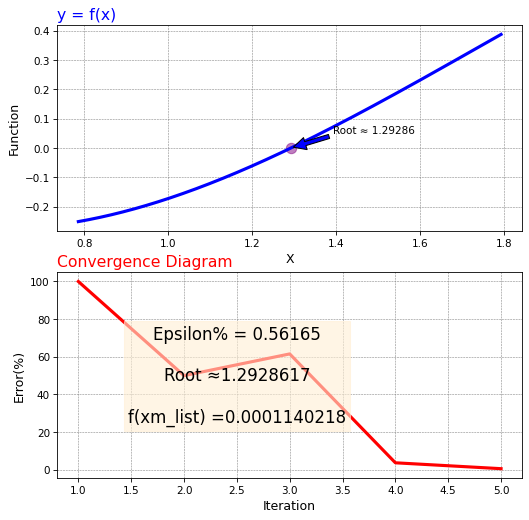

In [6]:
#Plot
fig = figure(figsize=(8, 8), dpi=75)

plt.subplot(2,1,1)
x = np.arange(xm_list[i-2]-0.5,xm_list[i-1]+0.5,0.00001)
y = f(x)
font1 = {'color':'blue','size':15}

plt.annotate('Root ≈ '+str(np.round(xm_list[i-1],5)), xy=(xm_list[i-1], f(xm_list[i-1])),xytext=(xm_list[i-1]+0.1, f(xm_list[i-1])+0.05), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.plot(x, y, 'b-', linewidth=3)
plt.scatter(xm_list[i-1],f(xm_list[i-1]), c='purple', s=100,alpha=0.5)
plt.xlabel('X', fontsize=12)
plt.ylabel('Function', fontsize=12)
plt.title('y = f(x)', fontdict=font1, loc='left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.subplot(2,1,2)
x = np.arange(1, i+1)
y = Epsilon
font2 = {'color':'red','size':15}
text = plt.text((i)/2, Epsilon[0]/2, 'Epsilon% = '+str(np.round(Epsilon[i-1],5))+'\n\nRoot ≈'+str(np.round(xm_list[i-1],7))+'\n\nf(xm_list) ='+str(np.round(f(xm_list[i-1]),10)), fontsize=16,horizontalalignment='center',verticalalignment='center')
text.set_bbox(dict(facecolor='papayawhip', alpha=0.6, edgecolor='papayawhip'))
plt.plot(x, y, 'r-', linewidth=3)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Error(%)', fontsize=12)
plt.title('Convergence Diagram', fontdict=font2, loc='left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()